<a href="https://colab.research.google.com/github/prevencao/trading/blob/master/estrategia_trader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://thecleverprogrammer.com/2020/05/25/ALGORITHMIC-TRADING-STRATEGY-WITH-MACHINE-LEARNING-AND-PYTHON/

---
## Algorítimo para Estrategia Trader com Machine Learning e Python
---

In [ ]:
#download do datasest
!wget 'https://thecleverprogrammer.com/wp-content/uploads/2020/05/AAPL.csv'

--2020-08-18 01:21:53--  https://thecleverprogrammer.com/wp-content/uploads/2020/05/AAPL.csv
Resolving thecleverprogrammer.com (thecleverprogrammer.com)... 192.0.78.224, 192.0.78.191
Connecting to thecleverprogrammer.com (thecleverprogrammer.com)|192.0.78.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108834 (106K) [application/octet-stream]
Saving to: ‘AAPL.csv’

AAPL.csv            100%[===================>] 106.28K  --.-KB/s    in 0.1s    

2020-08-18 01:21:53 (799 KB/s) - ‘AAPL.csv’ saved [108834/108834]



In [ ]:
#bibliotecas
import sys
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [ ]:
plt.style.use('dark_background')

In [ ]:
#armazenando os dados
#apple = pd.read_csv('drive/My Drive/Colab Notebooks/AAPL.csv')
apple = pd.read_csv('AAPL.csv')
apple

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,5/27/2014,87.982857,89.408569,87.947144,89.375717,80.948952,87216500
1,5/28/2014,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
2,5/29/2014,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
3,5/30/2014,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
4,6/2/2014,90.565712,90.690002,88.928574,89.807144,81.339699,92337700
...,...,...,...,...,...,...,...
1505,5/18/2020,313.170013,316.500000,310.320007,314.959991,314.959991,33843100
1506,5/19/2020,315.029999,318.519989,313.010010,313.140015,313.140015,25432400
1507,5/20/2020,316.679993,319.519989,316.519989,319.230011,319.230011,27876200
1508,5/21/2020,318.660004,320.890015,315.869995,316.850006,316.850006,25672200


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper lerft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


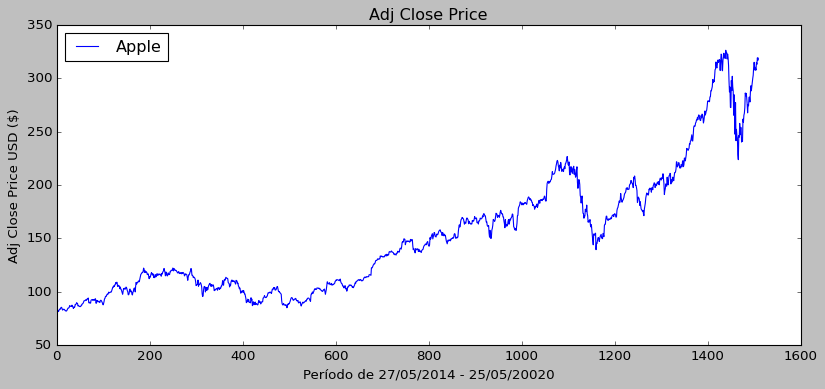

In [ ]:
#visualixzando os dados
plt.figure(figsize=(12, 5))
plt.plot(apple['Adj Close Price'], label='Apple')
plt.title('Adj Close Price')
plt.xlabel('Período de 27/05/2014 - 25/05/20020')
plt.ylabel('Adj Close Price USD ($)')
plt.legend(loc='upper lerft')
plt.show()

## Criando média móvel simples com uma janela de 30 dias

In [ ]:
sma30 = pd.DataFrame()
sma30['Adj Close Price'] = apple ['Adj Close Price'].rolling(window=30).mean()
sma30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1505,287.864806
1506,289.577426
1507,291.594106
1508,293.310716


## Criando uma janela de média móvel simples de 100 dias



In [ ]:
sma100 = pd.DataFrame()
sma100['Adj Close Price'] = apple ['Adj Close Price'].rolling(window=100).mean()
sma100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1505,289.734840
1506,290.037927
1507,290.345799
1508,290.630966


## Agora vamos visualizar os novos dados

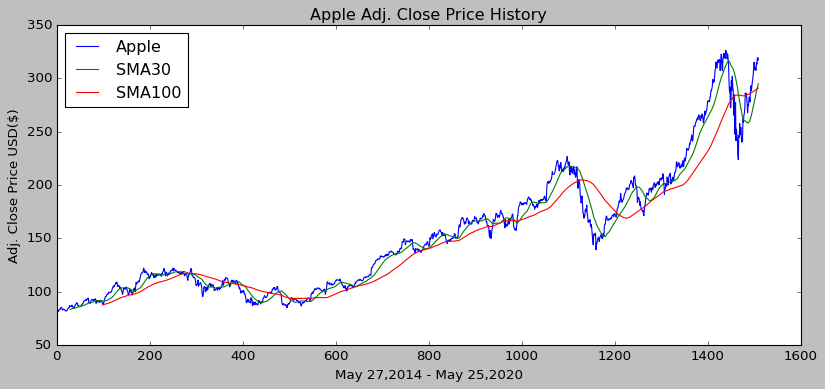

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(apple['Adj Close Price'], label='Apple')
plt.plot(sma30['Adj Close Price'], label='SMA30')
plt.plot(sma100['Adj Close Price'], label='SMA100')
plt.title("Apple Adj. Close Price History")
plt.xlabel('May 27,2014 - May 25,2020')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

## Criando um novo Data Frame para armazenar todos os dados

In [ ]:
data = pd.DataFrame()
data['apple'] = apple['Adj Close Price']
data['SMA30'] = sma30['Adj Close Price']
data['SMA100'] = sma100['Adj Close Price']
data

,apple,SMA30,SMA100
0,80.948952,NaN,NaN
1,80.739334,NaN,NaN
2,82.210480,NaN,NaN
3,81.902557,NaN,NaN
4,81.339699,NaN,NaN
...,...,...,...
1505,314.959991,287.864806,289.734840
1506,313.140015,289.577426,290.037927
1507,319.230011,291.594106,290.345799
1508,316.850006,293.310716,290.630966


## Criando uma função para sinalizar quando comprar ou vender ações

In [ ]:
def buySell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(data)):
    if data ['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['apple'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['apple'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [ ]:
#Para armazenar os dados de compra e venda em uma variável
buySell = buySell(data)
data['Buy Signal Price'] = buySell[0]
data['Sell Signal Price'] = buySell[1]
#Mostrar os dados
data

,apple,SMA30,SMA100,Buy Signal Price,Sell Signal Price
0,80.948952,NaN,NaN,NaN,NaN
1,80.739334,NaN,NaN,NaN,NaN
2,82.210480,NaN,NaN,NaN,NaN
3,81.902557,NaN,NaN,NaN,NaN
4,81.339699,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1505,314.959991,287.864806,289.734840,NaN,NaN
1506,313.140015,289.577426,290.037927,NaN,NaN
1507,319.230011,291.594106,290.345799,319.230011,NaN
1508,316.850006,293.310716,290.630966,NaN,NaN


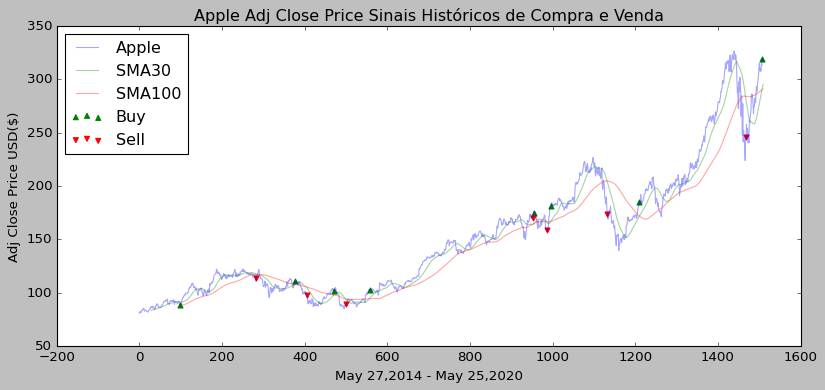

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(data['apple'], label='Apple', alpha=0.35)
plt.plot(data['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data['SMA100'],label='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy Signal Price'], label ='Buy', marker='^',color='green')
plt.scatter(data.index, data['Sell Signal Price'],label='Sell', marker='v', color='red')
plt.title('Apple Adj Close Price Sinais Históricos de Compra e Venda')
plt.xlabel("May 27,2014 - May 25,2020")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper left')
plt.show()